# Laboratorio 2

Estudiante 1: Juan Diego Niebles Navas - 202221193 \
Estudiante 2: Esteban Benavides Velandia - 202220429 \
Estudiante 3: Miguel Santiago Castillo Hernandez- 201633992

*Ey buenas a todos, guapisimos aquí el grupo 13 en un gameplay de planeta BI. El día de hoy vamos a resolver un problema agrupación de café (ñum ñum)...*



# 1. Entendimiento de los datos (Juan Diego Niebles)

Antes de empezar, es importante tener claro el objetivo del laboratorio, el cual es buscar grupos de café que tengan aspectos en común como heterogeneidad en tamaño, forma y estructura pues esto puede afectar tanto los procesos de tostión como la percepción de calidad del consumidor final. Así, en esta sección se va a escribir las características más relevantes de los datos y todo el perfilamiento de datos, incluir el análisis de calidad de datos y hacer una preselección de las variables más importantes para la etapa de modelado y poder cumplir de la mejor manera el objetivo.


In [13]:
# Instalación de paquetes necesarios (descomentar de ser necesario)

# !pip install numpy -q
# !pip install pandas -q
# !pip install matplotlib -q
# !pip install seaborn -q
# !pip install scikit-learn -q
# !pip install joblib -q

# imports

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


Inicialmente se va a realizar la carga de datos

In [14]:

# Cargar el dataset
df = pd.read_csv('Datos\Datos_SenecaféAlpes.csv', sep=',', encoding='utf-8')

# Visualizar las primeras filas
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\diego\AppData\Local\Temp\ipykernel_25240\832399760.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('Datos\Datos_SenecaféAlpes.csv', sep=',', encoding='utf-8')


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Se puede considerar la eliminación de la columna ID ya que esta no aporta información sobre la forma de las semillas, es un identificador.

Ahora se va a revisar el tamaño del dataset para entender mejor con qué se está trabajando.

In [15]:
# Revisar dimensiones
print("Dimensiones del dataset (filas, columnas):", df.shape)

Dimensiones del dataset (filas, columnas): (14291, 19)


Se puede afirmar que hay 14291 filas que corresponden a 19 tipos de datos diferentes, que según el diccionario son:

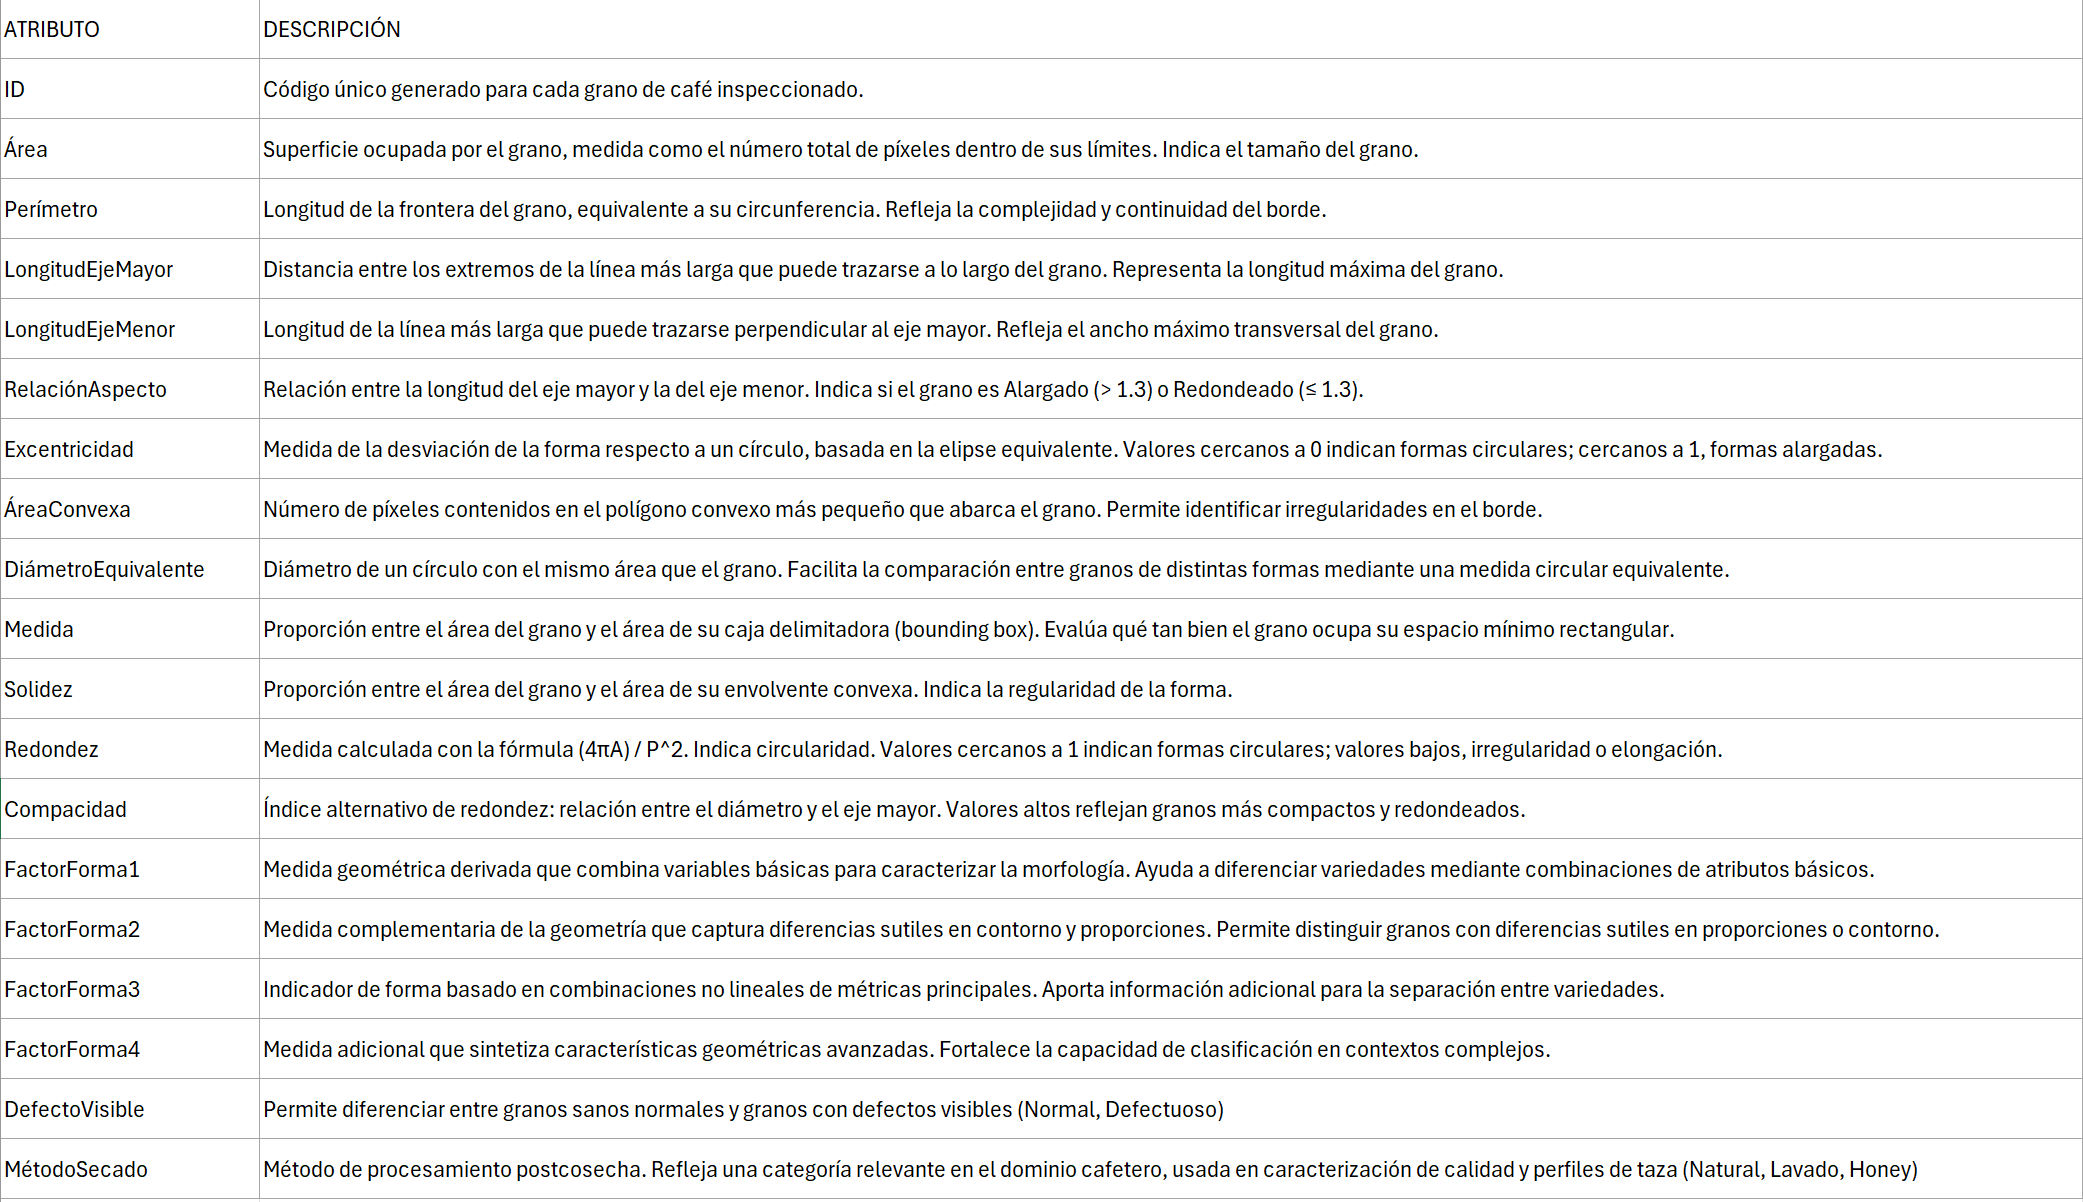

A continuación se confirman los tipos de datos.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

Relación aspecto, DefectoVisible y MétodoSecado son un strings por lo que aparecen de tipo object. Los demás son números. 

En cuanto a las estadisticas de las variables númericas se tiene que:

In [17]:
df.describe()

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Se puede ver desviaciones estandares muy altas para el área, el perimetro, las longitudes y el diametro. Esto puede ser un primer indicio de datos atipicos, por lo que se van a revisar los graficos de boxplot para ver mejor la distribución de los datos.

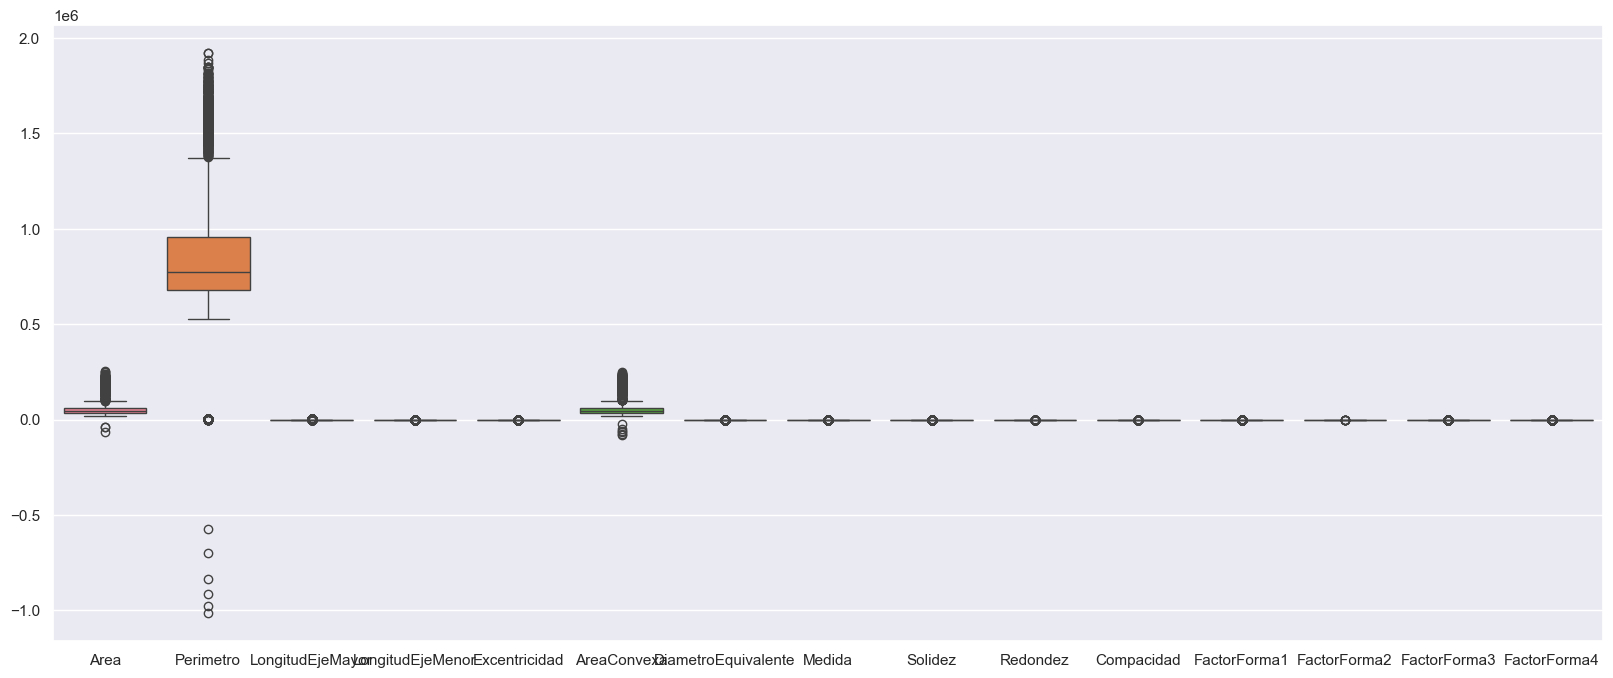

In [18]:


fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

Al estar en escalas diferentes se pierde información para varias graficas, pero se puede apreciar distribuciones raras para el area y el perimetro. A continuación se grafican de forma individual.

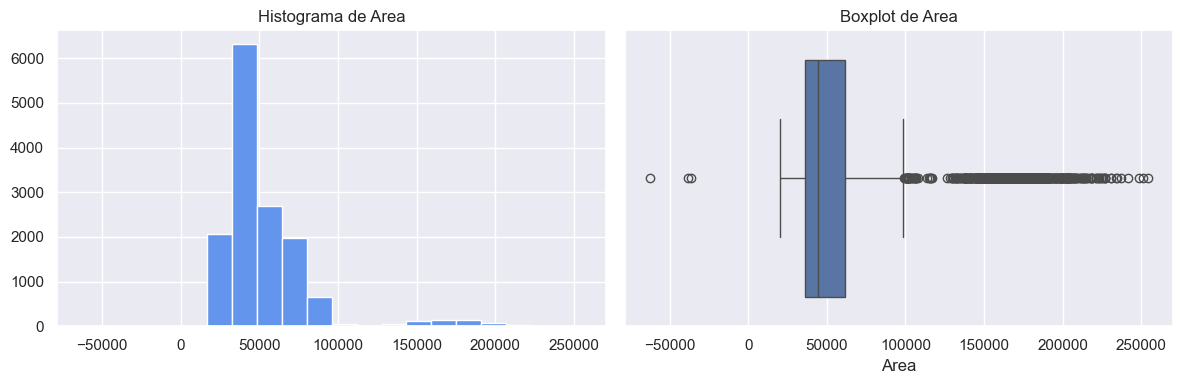

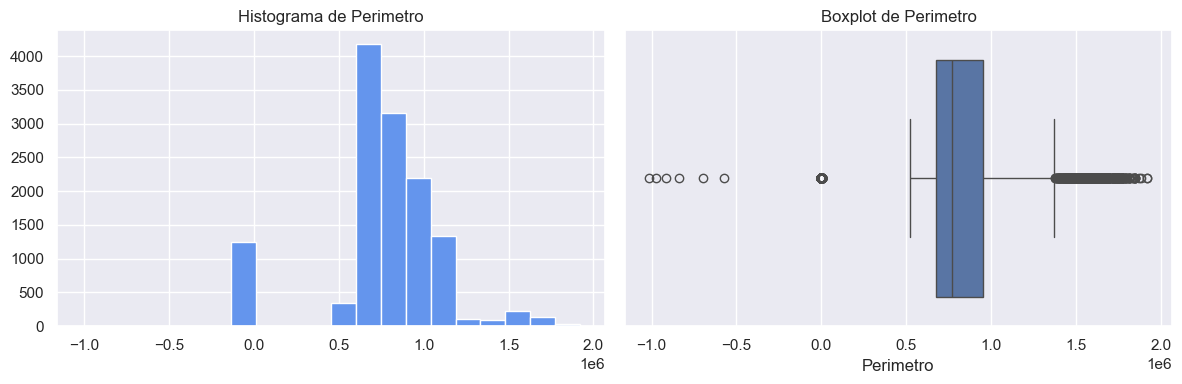

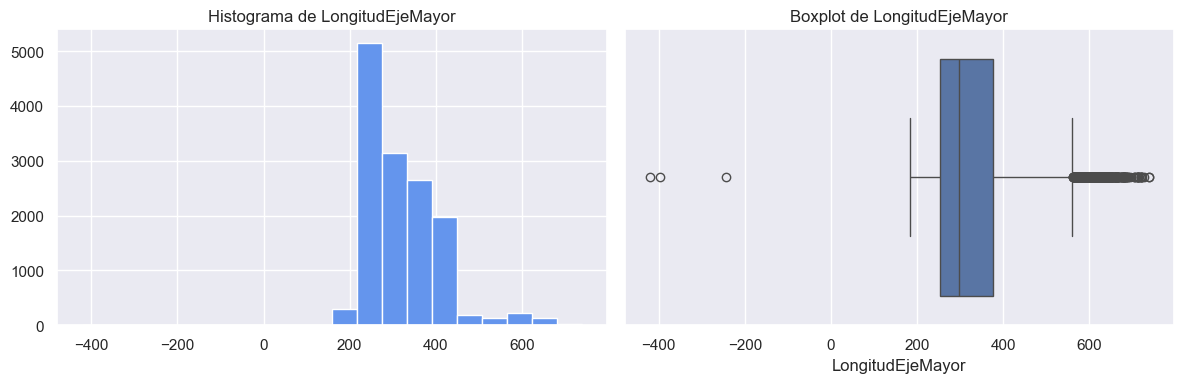

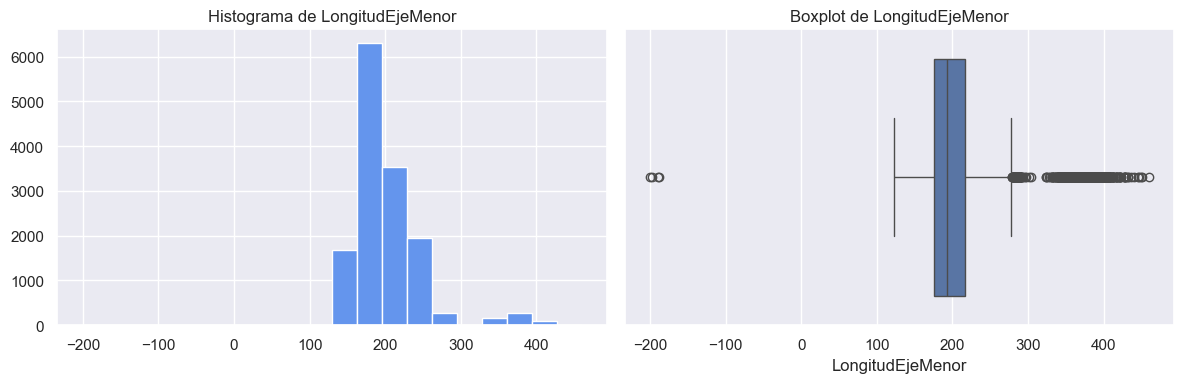

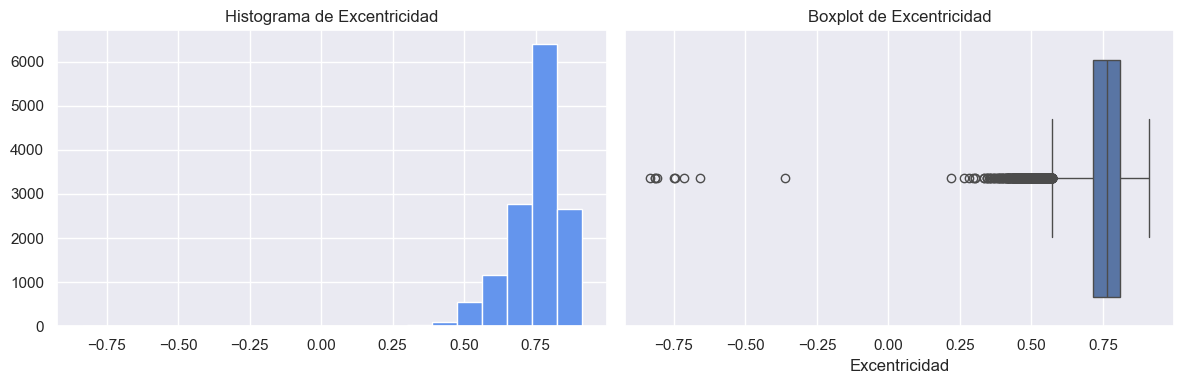

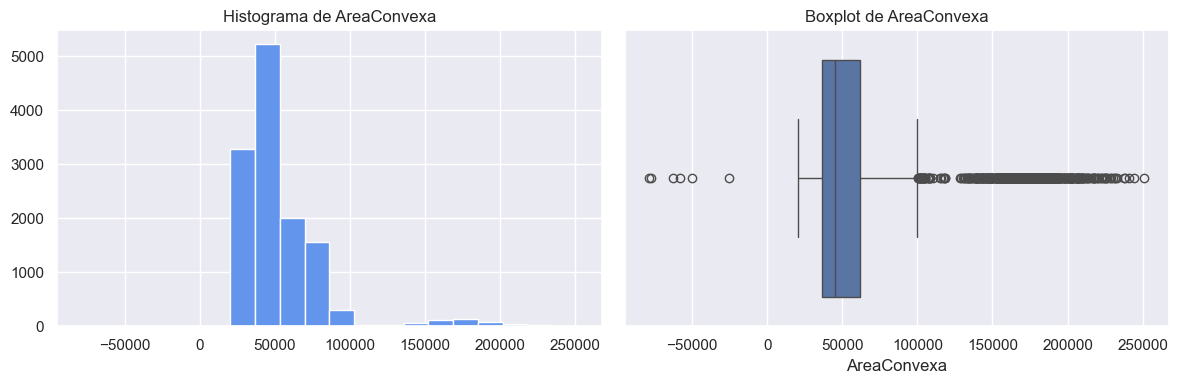

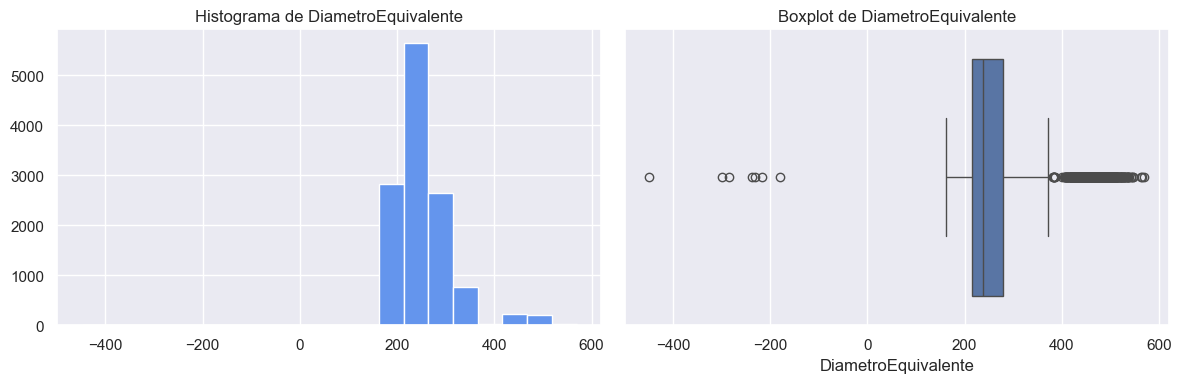

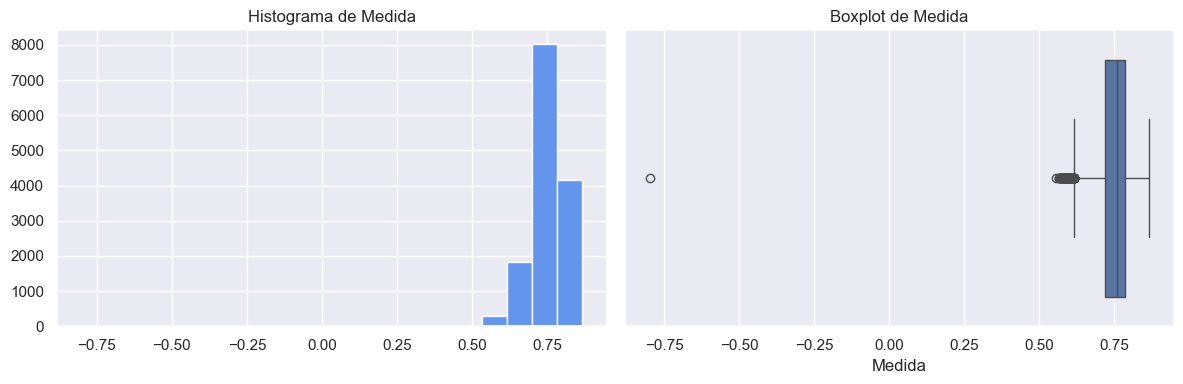

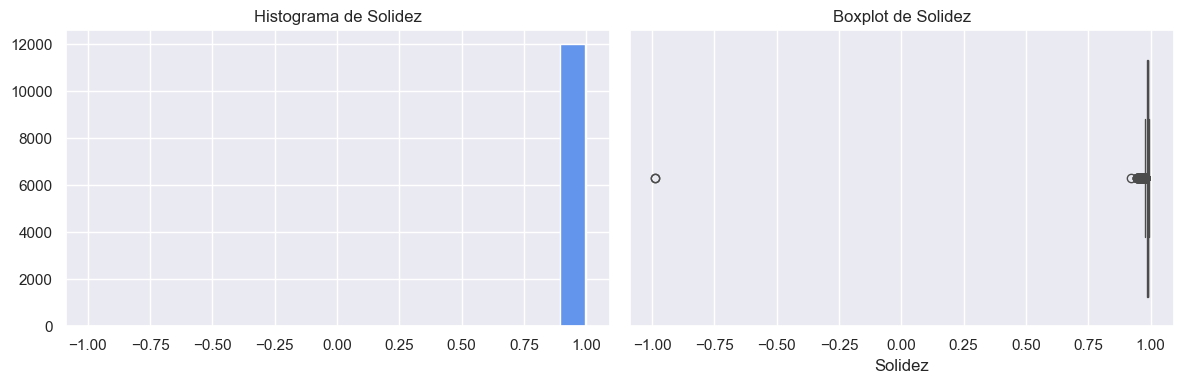

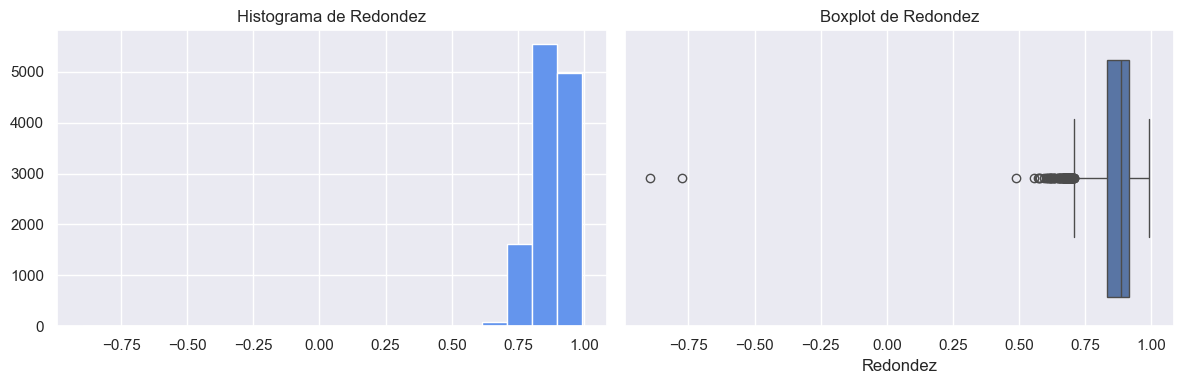

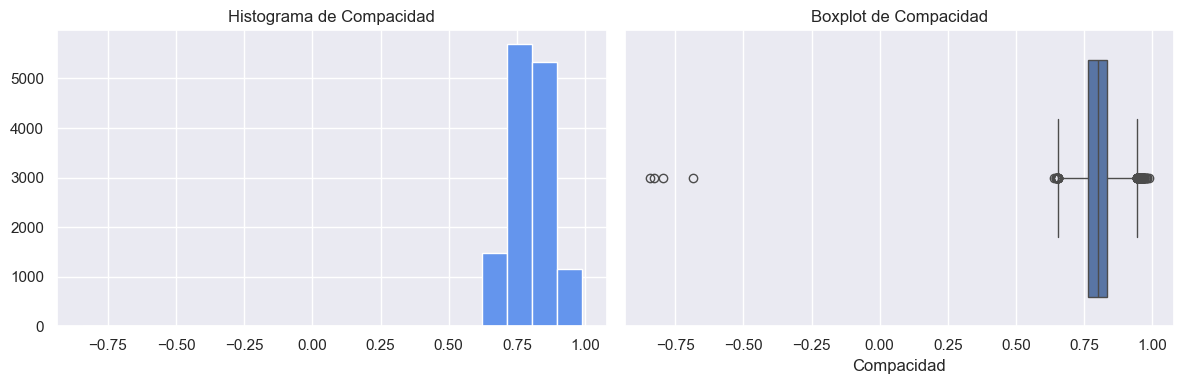

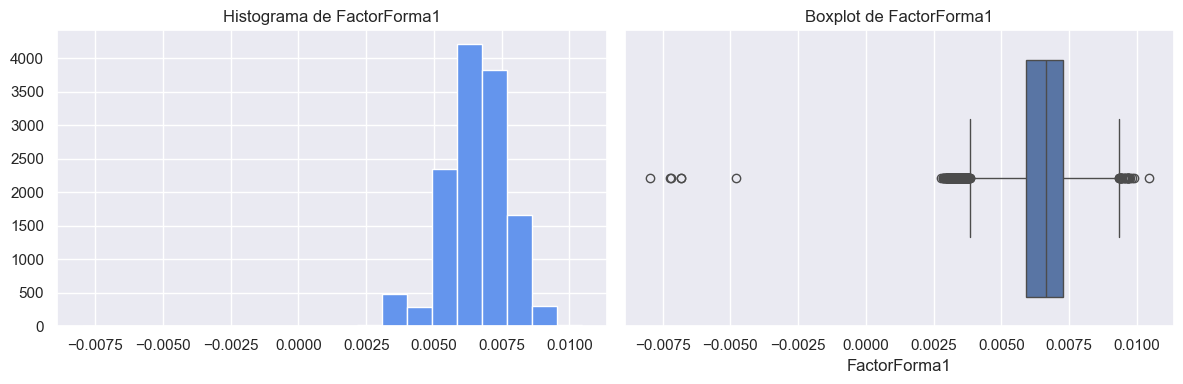

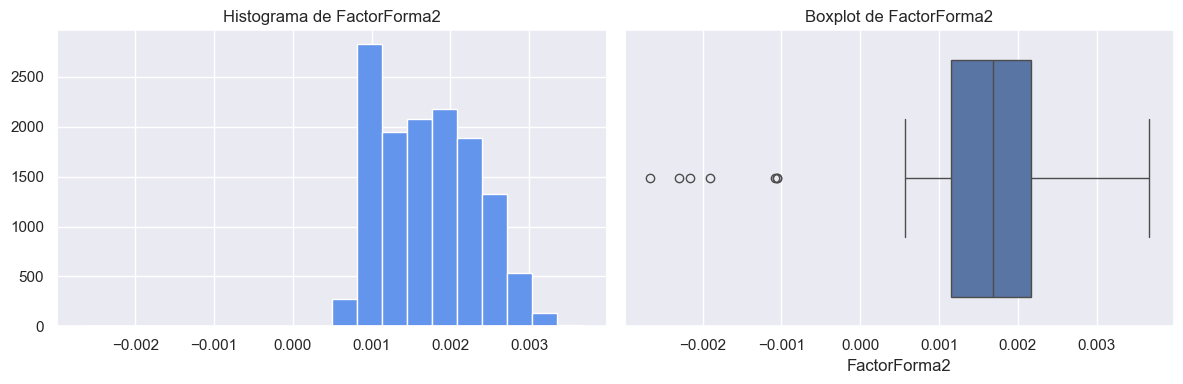

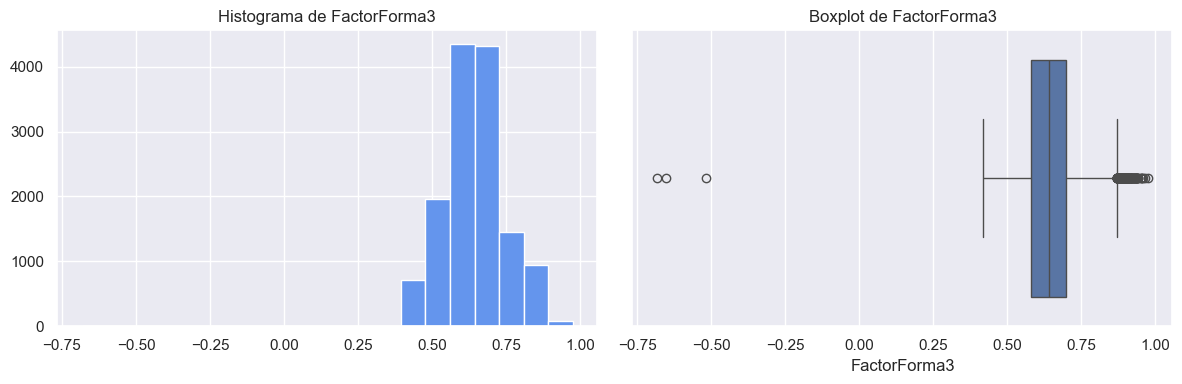

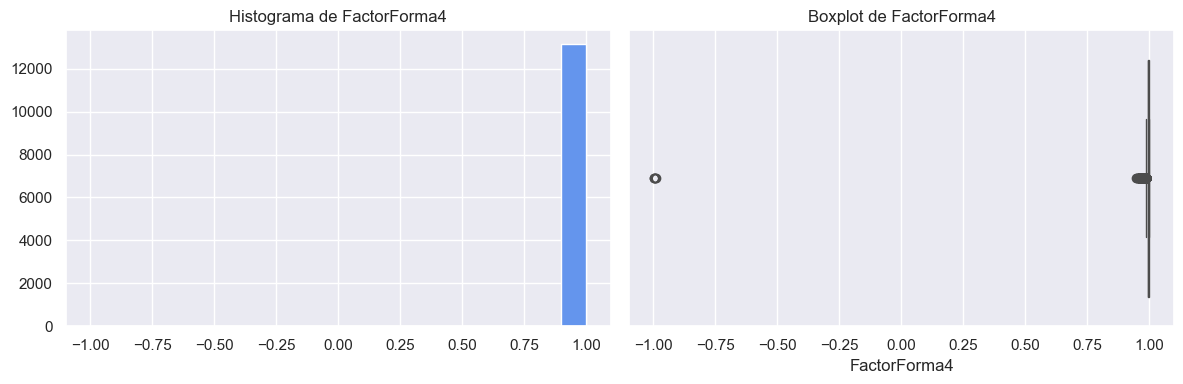

In [19]:

# Histogramas y boxplots para variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    df[col].dropna().hist(ax=axes[0], bins=20, color='cornflowerblue')
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(data=df, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

Se puede ver que la mayoria de las categorias tienen valores negativos, se va a tener que limpiar eso. También se puede evidenciar la existencia de valores fuera de los rangos normales. Por ejemplo, areas de más de 200 mil pixeles o perimetros mayores a 10 mil pixeles. Se puede pensar inicialmente que es mejor desechar ambas categorias del dataset ya que pueden distorcionar los resultados y no representan el tamaño real del objeto pues se ven afectados por la cantidad de zoom.

Ahora se van a ver las variables categoricas y su distribución.


In [26]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove("ID") 
if cat_cols:
    for col in cat_cols:
        print(f"\n---- value_counts() para '{col}' (top 20) ----")
        print(df[col].value_counts(dropna=False).head(20))


---- value_counts() para 'RelacionAspecto' (top 20) ----
RelacionAspecto
Alargado      12047
Redondeado     1739
NaN             466
alargado         29
redondeado       10
Name: count, dtype: int64

---- value_counts() para 'DefectoVisible' (top 20) ----
DefectoVisible
Normal    9096
NaN       2935
normal    2260
Name: count, dtype: int64

---- value_counts() para 'MétodoSecado' (top 20) ----
MétodoSecado
Lavado     6260
Natural    4639
lavado     1552
natural    1176
NaN         587
Honey        64
honey        13
Name: count, dtype: int64


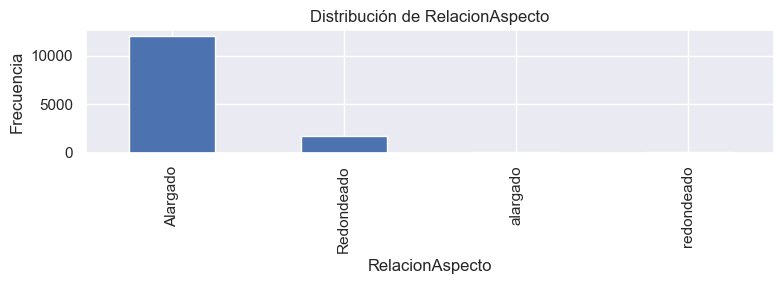

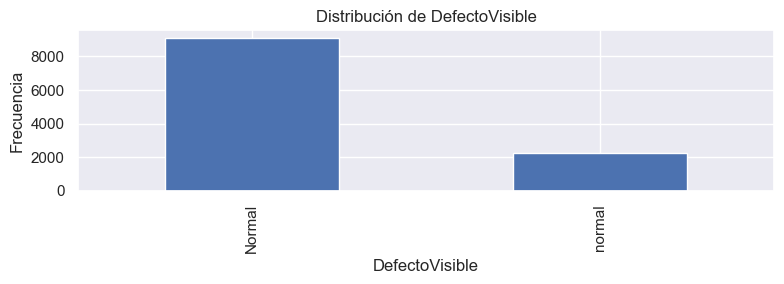

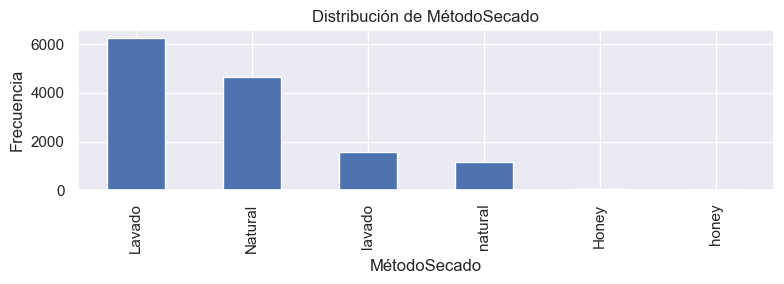

In [28]:
if cat_cols:
    for col in cat_cols:
        if df[col].nunique() <= 20:
            plt.figure(figsize=(8,3))
            df[col].value_counts().plot(kind='bar')
            plt.title(f"Distribución de {col}")
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.tight_layout()
            plt.show()

Se ve que defecto visible no aporta información ya que tiene dos categorías: normal y Normal, se puede eliminar. Las demás categorías sí muestran información acerca de a qué clase podrían pertenecer los granos aunque cuentan con columnas que estan repetidas por lo que hay que arreglar eso antes de hacer cuaquier transformación. 

Ahora se va a ver la correlación de las variables entre si, para ver si alguna sobra.

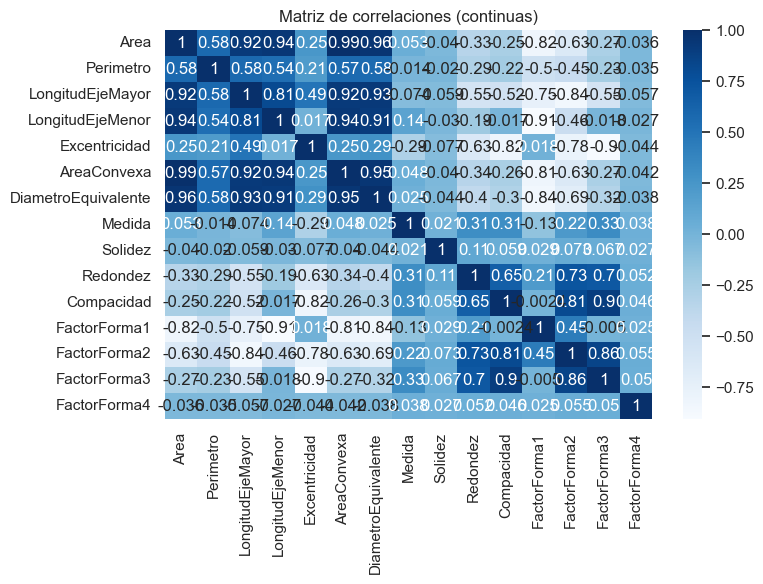

In [30]:
def es_binaria(serie):
    vals = serie.dropna().unique()
    return len(vals) <= 2

cont_cols = [c for c in num_cols if not es_binaria(df[c])]
bin_cols  = [c for c in num_cols if es_binaria(df[c])]

if len(cont_cols) > 1:
    corr = df[cont_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='Blues')
    plt.title("Matriz de correlaciones (continuas)")
    plt.tight_layout()
    plt.show()

Se van a dejar las variables que tengan menos de 0.85 de correlación. 

Se puede ver una gran correlación entre DiametroEquivalente, AreaConvexa, LongitudEjeMenor, LongitudEjeMayor y Area. Se va a utilizar la variable DiametroEquivalente para representarlas.

También se puede simplificar la Compacidad y FactorForma2 que pueden ser representadas por FactorForma3.

Ahora, se va a ver la unicidad de los datos.


In [32]:
print(df.duplicated(keep = False).sum())

922


hay 922 filas repetidas.

Finalmente se van a revisar la cantidad de nulos que hay por categoría.

In [33]:
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64


Con respecto al tamaño del dataframe se puede ver que la cantidad de los nulos de las columnas que se van a utilizar no es tan significativa.